In [4]:
from urllib.request import urlopen, Request

In [10]:
# url = 'https://www.google.com/search?q=%EC%95%84%EC%9D%B4%EC%9C%A0&sca_esv=564995893&sxsrf=AB5stBg5Sua0463P7y2hZB1jxaRtdcZyYA%3A1694604669095&ei=fZ0BZaCtBYvihwP2ipHACQ&ved=0ahUKEwjg39eqvqeBAxUL8WEKHXZFBJgQ4dUDCBA&uact=5&oq=%EC%95%84%EC%9D%B4%EC%9C%A0&gs_lp=Egxnd3Mtd2l6LXNlcnAiCeyVhOydtOycoDILEC4YgAQYsQMYgwEyBBAAGAMyBBAuGAMyCxAAGIAEGLEDGIMBMgsQABiABBixAxiDATIEEAAYAzILEAAYgAQYsQMYgwEyCBAAGIAEGLEDMgQQABgDMgsQABiABBixAxiDATIaEC4YgAQYsQMYgwEYlwUY3AQY3gQY4ATYAQFIwAlQAFjRBXACeAGQAQGYAY4BoAGQBqoBAzAuNrgBA8gBAPgBAcICBxAjGIoFGCfCAgQQIxgnwgIFEAAYgATCAhEQLhiABBixAxiDARjHARjRA8ICCxAuGIAEGMcBGK8B4gMEGAAgQYgGAboGBggBEAEYFA&sclient=gws-wiz-serp'
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%9C%A0'

In [11]:
resp = urlopen(url)

In [12]:
resp.read()

b'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\x95\x84\xec\x9d\xb4\xec\x9c\xa0 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xed\x86\xb5\xed\x95\xa9\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\x95\x84\xec\x9d\xb4\xec\x9c\xa0\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xed\x86\xb5\xed\x95\xa9\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\x95\x84\xec\x9d\xb4\xec\x9c\xa0\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xed\x86\xb5\xed\x95\xa9\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\x

In [13]:
from urllib.error import HTTPError
from time import sleep

In [15]:
def download(url, retry = 3):
    resp = None
    try:
        resp = urlopen(url)
    except HTTPError as e:
        if 500 <= e.code:
            if retry >0:
                sleep(3)
                resp = download(url, retry-1)
            else:
                print('재방문 횟수 초과')
        else:
            print(e)

    return None if resp == None else resp.read()

In [16]:
download('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%9C%A0')

b'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="\xec\x95\x84\xec\x9d\xb4\xec\x9c\xa0 : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xed\x86\xb5\xed\x95\xa9\xea\xb2\x80\xec\x83\x89"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\xec\x95\x84\xec\x9d\xb4\xec\x9c\xa0\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xed\x86\xb5\xed\x95\xa9\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\xeb\x8b\xa4."> <meta name="description" lang="ko" content="\'\xec\x95\x84\xec\x9d\xb4\xec\x9c\xa0\'\xec\x9d\x98 \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xed\x86\xb5\xed\x95\xa9\xea\xb2\x80\xec\x83\x89 \xea\xb2\xb0\xea\xb3\xbc\xec\x9e\x85\xeb\x8b\x88\x

In [17]:
ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'

In [19]:
req = Request(url=url
             , headers = {'user-agent':ua}
             , method = 'GET')

In [65]:
resp.headers ,\
resp.code,\
resp.url ,\
resp.chunked, \
resp.debuglevel , \
resp.status ,\
resp.reason ,\
resp.msg ,\
resp.chunk_left

(<http.client.HTTPMessage at 0x28d5f4ad540>,
 200,
 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%9C%A0',
 True,
 0,
 200,
 'OK',
 'OK',
 None)

In [55]:
req.headers ,\
req.data ,\
req.fragment, \
req.full_url,\
req.host,\
req.method,\
req.origin_req_host,\
req.selector,\
req.type,\
req.unredirected_hdrs,\
req.unverifiable

({'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'},
 None,
 None,
 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%9C%A0',
 'search.naver.com',
 'GET',
 'search.naver.com',
 '/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%9C%A0',
 'https',
 {},
 False)

In [66]:
resp.getheaders()

[('Date', 'Wed, 13 Sep 2023 11:37:38 GMT'),
 ('Content-Type', 'text/html; charset=UTF-8'),
 ('Transfer-Encoding', 'chunked'),
 ('Connection', 'close'),
 ('Vary', 'Accept-Encoding'),
 ('Set-Cookie',
  'page_uid=idbQslprvxZssCjxmIhssssstY0-099420; path=/; domain=.naver.com'),
 ('Set-Cookie',
  '_naver_usersession_=XFwxnGvFeotOZY1jTzX1wQ==; path=/; expires=Wed, 13-Sep-23 11:42:38 GMT; domain=.naver.com'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('X-XSS-Protection', '1; report=/p/er/post/xss'),
 ('Cache-Control', 'no-cache, no-store, must-revalidate, max-age=0'),
 ('Pragma', 'no-cache'),
 ('Set-Cookie',
  'nx_ssl=2; Domain=.naver.com; Path=/; Expires=Fri, 13-Oct-2023 11:37:38 GMT;'),
 ('Referrer-Policy', 'unsafe-url'),
 ('Vary', 'Accept-Encoding'),
 ('Server', 'nxg'),
 ('Accept-CH',
  'Sec-CH-UA, Sec-CH-UA-Arch, Sec-CH-UA-Bitness, Sec-CH-UA-Full-Version-List, Sec-CH-UA-Mobile, Sec-CH-UA-Model, Sec-CH-UA-Platform, Sec-CH-UA-Platform-Version, Sec-CH-UA-WoW64')]

In [59]:
req.get_full_url()

'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%9C%A0'

In [70]:
from html import unescape
unescape('&#52852;&#47532;&#45208;')

'카리나'

In [78]:
resp.getheaders()

[('Date', 'Wed, 13 Sep 2023 11:37:38 GMT'),
 ('Content-Type', 'text/html; charset=UTF-8'),
 ('Transfer-Encoding', 'chunked'),
 ('Connection', 'close'),
 ('Vary', 'Accept-Encoding'),
 ('Set-Cookie',
  'page_uid=idbQslprvxZssCjxmIhssssstY0-099420; path=/; domain=.naver.com'),
 ('Set-Cookie',
  '_naver_usersession_=XFwxnGvFeotOZY1jTzX1wQ==; path=/; expires=Wed, 13-Sep-23 11:42:38 GMT; domain=.naver.com'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('X-XSS-Protection', '1; report=/p/er/post/xss'),
 ('Cache-Control', 'no-cache, no-store, must-revalidate, max-age=0'),
 ('Pragma', 'no-cache'),
 ('Set-Cookie',
  'nx_ssl=2; Domain=.naver.com; Path=/; Expires=Fri, 13-Oct-2023 11:37:38 GMT;'),
 ('Referrer-Policy', 'unsafe-url'),
 ('Vary', 'Accept-Encoding'),
 ('Server', 'nxg'),
 ('Accept-CH',
  'Sec-CH-UA, Sec-CH-UA-Arch, Sec-CH-UA-Bitness, Sec-CH-UA-Full-Version-List, Sec-CH-UA-Mobile, Sec-CH-UA-Model, Sec-CH-UA-Platform, Sec-CH-UA-Platform-Version, Sec-CH-UA-WoW64')]

In [89]:
def download(url, method='GET', retry = 3):
    resp = None
    try:
        req = Request(url
                     , headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'}
                     , method=method
                     )
        resp = urlopen(req)
    except HTTPError as e:
        if 500 <= e.code:
            if retry >0:
                sleep(3)
                resp = download(url
                               , method= method
                               , retry= retry-1
                               )
            else:
                print('재방문 횟수 초과')
        else:
            print('Request', req.headers())
            print('Response', e)
    return None if resp == None else resp.read()

In [90]:
type(resp)

http.client.HTTPResponse

In [91]:
resp.decode()

AttributeError: 'HTTPResponse' object has no attribute 'decode'

In [92]:
resp = download('https://www.google.com/search?q=%EC%95%84%EC%9D%B4%EC%9C%A0&sca_esv=564995893&sxsrf=AB5stBh7a3idIp79IUCepgetqbYZrmoIGQ%3A1694607276232&source=hp&ei=rKcBZe27C83CoAT-mKS4AQ&iflsig=AD69kcEAAAAAZQG1vBco-oIqGA5X4fCODX3wq77Saf70&oq=&gs_lp=Egdnd3Mtd2l6IgAqAggAMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnMgcQIxjqAhgnSNgMUABYAHABeACQAQCYAQCgAQCqAQC4AQPIAQCoAgo&sclient=gws-wiz')

In [93]:
type(resp)

bytes

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>아이유 - Google 검색</title><script nonce="1-DWdpEcRJeBlxaGisWBKQ">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'wqcBZeLFFNP4hwPRp7nwDg\',kEXPI:\'31\',kBL:\'CBLH\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'ko\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getAt
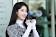
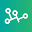
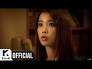
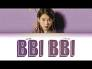
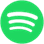
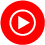
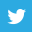
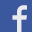
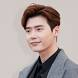
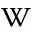
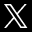
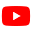
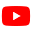
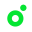
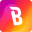
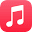
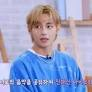
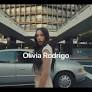
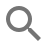
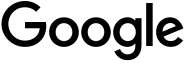

In [94]:
resp.decode()

In [95]:
resp = download('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%95%84%EC%9D%B4%EC%9C%A0')

In [96]:
type(resp)

bytes

In [97]:
resp.decode()

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="pc win chrome">\n    \n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n    <meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="autocomplete" content="off" />\n    <meta name="referrer" content="always">\n    <meta name="format-detection" content="telephone=no" />\n    <meta property="og:title" content="아이유 &ndash; Daum 검색" />\n    <meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%EC%95%84%EC%9D%B4%EC%9C%A0" />\n    <meta property="og:description" content="Daum 검색에서 아이유에 대한 최신정보를 찾아보세요." />\n    <meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n    <meta property="og:site_name" content="다음검색" />\n    <title>아이유 &ndash; Daum 검색</title>\n\n    \n

In [98]:
from urllib.parse import quote, quote_plus

In [99]:
!pip install builtwith


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for builtwith: filename=builtwith-1.3.4-py3-none-any.whl size=36110 sha256=a30f22c911d1f6dbe4ffcd597b4ef8ee70b375b38e74f14ea01ca63938fbb218
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6e\bf\03\4e45fb3049b99c21360499dfdad979d11b73e972fb2d3ad56c
Successfully built builtwith


In [100]:
from builtwith import builtwith

In [102]:
builtwith('http://wordpress.com')

{'web-servers': ['Nginx'],
 'ecommerce': ['WooCommerce'],
 'cms': ['WordPress'],
 'programming-languages': ['PHP'],
 'blogs': ['PHP', 'WordPress'],
 'javascript-frameworks': ['jQuery']}

In [103]:
builtwith('https://www.naver.com/')

{}

In [104]:
builtwith('https://www.google.com/')

{'web-servers': ['Google Web Server']}

In [105]:
builtwith('https://www.daum.net/')

{}

In [106]:
!pip install python-whois

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/109.6 kB ? eta -:--:--
     -------------------------------------- 109.6/109.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     ----------------------------- ------- 675.8/840.9 kB 44.4 MB/s eta 0:00:01
     ------------------------------------- 840.9/840.9 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103289 sha256=d20f9d820d505a034a1de30ddefc8690c02ba5e38f2c8e5f02b5137872e938a8
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\10\f1\87\145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
  Created wheel for future: filename=futu

In [107]:
from whois import whois

In [108]:
whois('http://wordpress.com')

{'domain_name': ['WORDPRESS.COM', 'wordpress.com'],
 'registrar': 'MarkMonitor, Inc.',
 'whois_server': 'whois.markmonitor.com',
 'referral_url': None,
 'updated_date': datetime.datetime(2023, 8, 28, 7, 34, 11),
 'creation_date': datetime.datetime(2000, 3, 3, 12, 13, 23),
 'expiration_date': [datetime.datetime(2033, 3, 3, 12, 13, 23),
  datetime.datetime(2033, 3, 3, 0, 0)],
 'name_servers': ['NS1.WORDPRESS.COM',
  'NS2.WORDPRESS.COM',
  'NS3.WORDPRESS.COM',
  'NS4.WORDPRESS.COM',
  'ns2.wordpress.com',
  'ns3.wordpress.com',
  'ns4.wordpress.com',
  'ns1.wordpress.com'],
 'status': ['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
  'clientTransferProhibited https://icann.org/epp#clientTransferProhibited',
  'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited',
  'serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited',
  'serverTransferProhibited https://icann.org/epp#serverTransferProhibited',
  'serverUpdateProhibited https://icann

In [111]:
domain_info = whois('https://www.naver.com/')
print(domain_info)

{
  "domain_name": "NAVER.COM",
  "registrar": "Gabia, Inc.",
  "whois_server": "whois.gabia.com",
  "referral_url": null,
  "updated_date": "2023-06-29 06:40:14",
  "creation_date": "1997-09-12 04:00:00",
  "expiration_date": "2032-09-11 04:00:00",
  "name_servers": [
    "NS1.NAVER.COM",
    "NS2.NAVER.COM"
  ],
  "status": [
    "clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited",
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited"
  ],
  "emails": "abuse@gabia.com",
  "dnssec": "unsigned",
  "name": null,
  "org": null,
  "address": null,
  "city": null,
  "state": null,
  "registrant_postal_code": null,
  "country": null
}


In [117]:
print(domain_info.dayfirst)
domain_info.domain,\
domain_info.status

False


('naver.com',
 ['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
  'clientTransferProhibited https://icann.org/epp#clientTransferProhibited',
  'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited'])

In [119]:
a = builtwith('https://www.naver.com/')

In [120]:
a

{}

In [124]:
quote('a  b'),quote('ab'), quote_plus('가 나')

('a%20%20b', 'ab', '%EA%B0%80+%EB%82%98')

In [125]:
resp = download('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%B9%B4%EB%A6%AC%EB%82%98')

In [126]:
resp.decode()

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="카리나 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'카리나\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'카리나\'의 네이버 통합검색 결과입니다."> <title>카리나 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.n

In [127]:
from urllib.parse import unquote, unquote_plus

In [128]:
quote('a  b'),quote('ab'), quote_plus('가 나') ,\
unquote(quote('a  b')),unquote(quote('ab')), unquote(quote_plus('가 나'))

('a%20%20b', 'ab', '%EA%B0%80+%EB%82%98', 'a  b', 'ab', '가+나')

In [129]:
url

'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%95%84%EC%9D%B4%EC%9C%A0'

In [134]:
params = []

print(url.split('?')[-1].split('&')[-1].split('%'))

['query=', 'EC', '95', '84', 'EC', '9D', 'B4', 'EC', '9C', 'A0']


In [149]:
for row in url.split('?')[-1].split('&'):
    if row.split('=')[0] == 'query':
        print(row)
        params.append('='.join(['hi', 'bye']))
    else:
        print('no')

params

no
no
no
no
query=%EC%95%84%EC%9D%B4%EC%9C%A0


['h=i', 'h=i', 'hi=bye']

In [151]:
data = """
park 800905-1049118
kim  700905-1059119
"""

print(data)


park 800905-1049118
kim  700905-1059119



In [160]:
result = []

for i in data.split('\n'):
    print(data)


park 800905-1049118
kim  700905-1059119


park 800905-1049118
kim  700905-1059119


park 800905-1049118
kim  700905-1059119


park 800905-1049118
kim  700905-1059119

